# Image Classification using `sklearn.Randomforest`

In [0]:
# import os 
# os.chdir('/content/drive/working/')

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split
import math
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray

### Load images in structured directory like it's sklearn sample dataset

In [8]:
def load_image_files(container_path, dimension=(64, 64)):
    """
    Load image files with categories as subfolder names 
    which performs like scikit-learn sample dataset
    
    Parameters
    ----------
    container_path : string or unicode
        Path to the main folder holding one subfolder per category
    dimension : tuple
        size to which image are adjusted to
    Returns  Bunch
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr = "A image classification dataset"

    
#     revised code
#   get the total length
    total_len=0
    for direct in folders:
        for i,f in enumerate(direct.iterdir()):
            total_len+=1
            if i>1000:
              break
    print('length: '+str(total_len))
    flat_data=np.zeros( (total_len,dimension[0]*dimension[1]) )
    target=np.zeros(total_len)
    index=0
    
    for i, direc in enumerate(folders):
        print('adding files to '+direc.name)
        for n,file in enumerate(direc.iterdir()):
            img = rgb2gray(imread(file))
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data[index]=(img_resized.flatten()) 
#             images.append(img_resized)
            target[index]=i
            index+=1
            del img
            del img_resized
            if n>1000:
              break

    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
#                  images=images,
                 DESCR=descr)

In [9]:
image_dataset = load_image_files("Fabrics_train_lowClass/",(120,120))

length: 25050
adding files to Velvet
adding files to Wool
adding files to Fleece
adding files to Felt
adding files to Artificial_leather
adding files to Viscose
adding files to Polyester
adding files to Cotton
adding files to Chenille
adding files to Unclassified
adding files to Blended
adding files to Lut
adding files to Corduroy
adding files to Suede
adding files to Silk
adding files to Utilities
adding files to Satin
adding files to Denim
adding files to Artificial_fur
adding files to Acrylic
adding files to Leather
adding files to Terrycloth
adding files to Crepe
adding files to Linen
adding files to Nylon


In [ ]:

# split data
X_train, X_test, y_train, y_test = train_test_split(
    image_dataset.data, image_dataset.target, test_size=0.2,random_state=109)

# train data with parameter optimization
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, param_grid)
clf.fit(X_train, y_train)

# predict data
y_pred = clf.predict(X_test)

# report
print("Classification report for - \n{}:\n{}\n".format(clf, metrics.classification_report(y_test, y_pred)))


# dumping model

import pickle
with open('./clf_auged.pickle','wb') as f:
    pickle.dump(clf,f)
# with open('./clf.pickle','rb') as f:
#     clf2=pickle.load(f)
print('done')

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
import pickle 
with open('./clf_small_dim.pickle','rb') as f:
    clf2=pickle.load(f)
y=clf2.predict(image_dataset.data)
print(metrics.classification_report(image_dataset.target,y))

              precision    recall  f1-score   support

         0.0       0.77      0.23      0.35        44
         1.0       0.89      0.39      0.54       360
         2.0       0.84      0.35      0.49       132
         3.0       0.00      0.00      0.00        16
         4.0       1.00      0.17      0.29        12
         5.0       0.89      0.17      0.28       148
         6.0       0.67      0.16      0.26       904
         7.0       0.43      0.93      0.59      2352
         8.0       0.80      0.71      0.76        52
         9.0       0.97      0.31      0.47       492
        10.0       0.58      0.48      0.52      1645
        11.0       1.00      0.56      0.72        16
        12.0       0.93      0.40      0.55        96
        13.0       0.00      0.00      0.00        20
        14.0       0.70      0.27      0.39       200
        15.0       0.00      0.00      0.00         4
        16.0       0.32      0.07      0.12        96
        17.0       0.93    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
from pathlib import Path

path=Path('Fabrics_train')


In [0]:
for dir1 in path.iterdir():
#     if dir1.is_dir():
#         print(len([i for i in dir1.iterdir()]))
    if dir1.is_dir():
        dirLen=len([i for i in dir1.iterdir()])
        if dirLen>100:
            print(dir1.name)

Wool
Fleece
Viscose
Polyester
Cotton
Unclassified
Blended
Silk
Denim
Terrycloth
Crepe
Nylon


In [0]:
img=[j for j in [i for i in path.iterdir()][10].iterdir()][0]

In [0]:
from skimage.io import imread
img=imread(img)

In [0]:
from skimage.color import rgb2gray
img=rgb2gray(img)


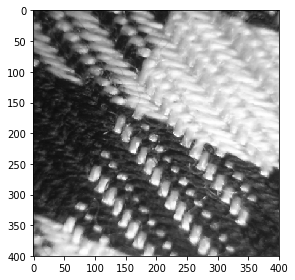

In [0]:
from skimage.io import imshow
import matplotlib.pyplot as plt
imshow(img)
plt.show()

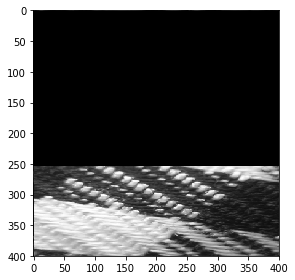

In [0]:
import numpy as np
import math
def newPosition(x,y):
#     60 degree
    return (math.ceil(math.cos(math.pi/3)*x-math.sin(math.pi/3)*x),math.ceil(math.sin(math.pi)*y+math.cos(math.pi)*y))

new_img=np.zeros(len(img.flatten())).reshape(img.shape[0],img.shape[1])
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        newxy=newPosition(x,y)
        new_img[newxy[0]][newxy[1]]=img[x][y]

imshow(new_img)
plt.show()
    

In [0]:
new_img

array([[0.1325298 , 0.        , 0.29750353, ..., 0.19135333, 0.18044471,
        0.14151176],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.30085961, 0.        , 0.46589294, ..., 0.15518824, 0.1641702 ,
        0.22299373],
       [0.1470702 , 0.        , 0.43673765, ..., 0.12831059, 0.11821255,
        0.12213412],
       [0.10029412, 0.        , 0.38967176, ..., 0.15213059, 0.12888392,
        0.10143294]])

(1, 400, 400, 3)


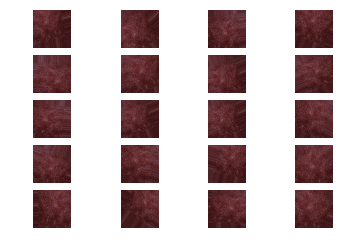